In [1]:
#!pip install astroML numpy<=1.26.4

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_context("talk")
sns.set_theme(style="whitegrid")
%matplotlib inline

In [3]:
from astroML.datasets import fetch_LINEAR_sample, fetch_LINEAR_geneva
data = fetch_LINEAR_sample()
gen = fetch_LINEAR_geneva()

def get_example_varstar(linear_class=4, source_id=4):
    # LC_types = RR_Lyrae_FM' = 1
    #            'RR_Lyrae_FO' = 2
    #            'Beta_Persei' = 4
    #            'W_Ursae_Maj' = 5
    #            'Delta_Scuti' = 6
    
    class_ids = gen[gen["LCtype"] == linear_class]["LINEARobjectID"]
    star_id = class_ids[source_id]  # change this ID to try diffrent sources
    
    star = gen[gen["LINEARobjectID"] == star_id]
    
    P = 10**star["logP"][0]
    
    t, mag, dmag = data.get_light_curve(star_id).T
    return t, mag, dmag, P, star_id

[=========================================]  303.4kb / 303.4kb   
[=========================================]  16.05Mb / 16.05Mb   


In [4]:
t, mag, dmag, P, star_id = get_example_varstar(linear_class=2, source_id=2)
print(P)

# fit a model 
from astropy.timeseries import LombScargle
best_frequency = 1/P
t_fit = t.copy()

## change nterms to be higher if its an EA
ls = LombScargle(t, mag, dmag, nterms=8)
y_fit = ls.model(t_fit, best_frequency)

phased = (t % P)/P
phased_i = np.argsort(phased)

ϕ = phased[phased_i]
mag = mag[phased_i]
dmag = dmag[phased_i]
mag_fit = y_fit[phased_i]

0.3396290262883835


In [5]:
# get the limits 
typical_error = np.median(dmag)
ymax = np.max(y_fit) + 4*typical_error
ymin = np.min(y_fit) - 4*typical_error

(15.880544789056104, 15.186658285248717)

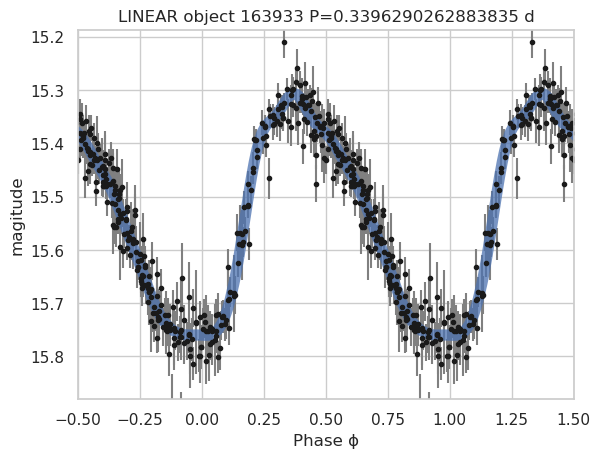

In [16]:
fig, ax = plt.subplots()

ax.errorbar(list(ϕ-1)+list(ϕ)+list(ϕ+1), list(mag)*3, list(dmag)*3, fmt='.k', ecolor='gray')
ax.plot(list(ϕ-1)+list(ϕ)+list(ϕ+1),list(mag_fit)*3,linewidth=8,alpha=0.75)

ax.set(xlabel='Phase ϕ', ylabel='magitude',
       title=f'LINEAR object {star_id} P={P} d')
ax.set_xlim(-0.5,1.5)
ax.set_ylim(ymax,ymin)
# ax.invert_yaxis();